# Linear Regression relating Goals a team scores in a game to if they win

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('./company-data.csv')
df.columns

Index(['Sales', 'Profit', 'Assets', 'Market_Value'], dtype='object')

In [70]:
cor_val_temp_StoMV = np.corrcoef(df.Sales,df.Market_Value)
cor_val_StoMV = cor_val_temp_StoMV[0,1]
print(cor_val_StoMV)

0.5179374231237686


In [50]:
# extract X and Y for regression model
Y = df.Sales # dependent variable
X = df.Market_Value # independent variable

# make sure that constant term is included in linear regression model
X = sm.add_constant(X)

In [76]:
slr_model = sm.OLS(Y,X).fit()

In [82]:
sigma_Y = np.sqrt(np.var(Y))
sigma_X = np.sqrt(np.var(X.Market_Value))

b = cor_val_StoMV * (sigma_Y/sigma_X)
a = np.mean(Y) - (b*np.mean(X.Market_Value))
print(a)

18.696273548914064


In [87]:
# Pick 100 points equally spaced from min to max for the independent variable
X_set = np.linspace(X.Market_Value.min(), X.Market_Value.max(), 100)

# include the constant term in the linear regression model
X_prime = sm.add_constant(X_set)


In [88]:


Y_hat = slr_model.predict(X_prime)

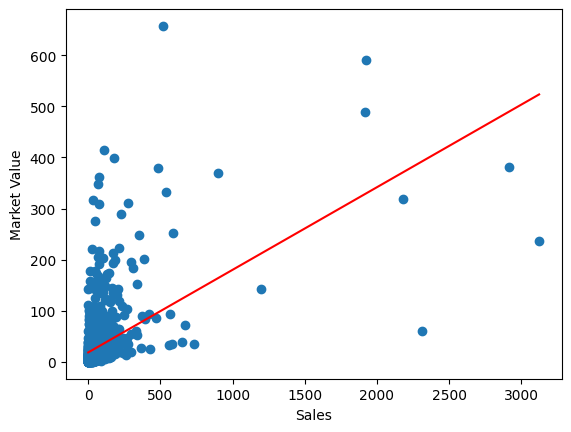

In [89]:
# plot the original data (scatter plot)
plt.scatter(X.Market_Value,Y)

# add labels to the plots
plt.xlabel("Sales")
plt.ylabel("Market Value")

# add the regression line
plt.plot(X_prime[:,1], Y_hat, 'red' )